# FACIAL EMOTION RECOGNITION

This model detects and classifies human emotions from facial expressions in both static images and live webcam feeds.

Libraries used: 
NumPy
OpenCV
Matplotlib
Tensorflow

Authors: ERC, IIT Bombay

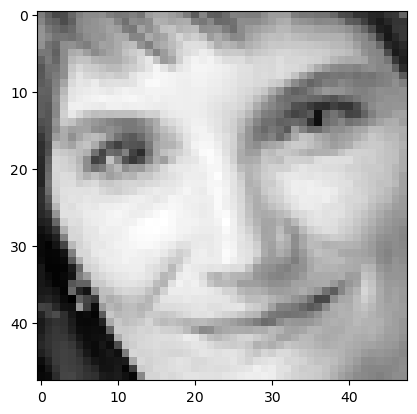

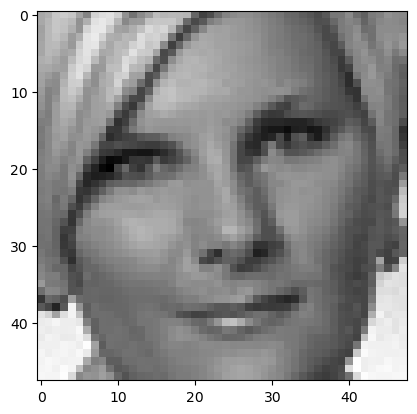

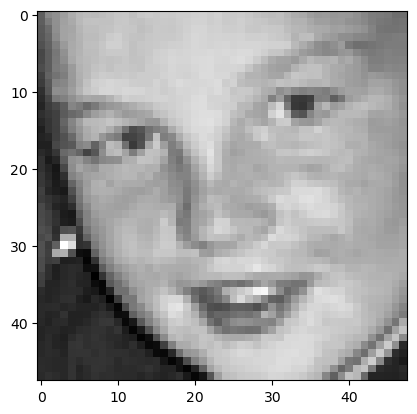

Found 15216 images belonging to 3 classes.
Found 3852 images belonging to 3 classes.


In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array


train_data_dir = '/Users/saravan/Downloads/archive/train'
val_data_dir = '/Users/saravan/Downloads/archive/test'

#printing some data
path=os.path.join(train_data_dir,"happy")
i=0

for img in os.listdir(path):
    i=i+1
    img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    if (i<=3) :
        plt.imshow(img_array, cmap="gray")
        plt.show()
    else:
        break


#data preprocessing, augumenting the images to increase generalization of the model
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(train_data_dir, target_size=(48, 48), color_mode='grayscale', batch_size=64, class_mode='categorical')
val_generator = val_datagen.flow_from_directory(val_data_dir, target_size=(48, 48), color_mode='grayscale', batch_size=32, class_mode='categorical')


In [6]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=30)

Epoch 1/30


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.4762 - loss: 1.0485 - val_accuracy: 0.5382 - val_loss: 0.9345
Epoch 2/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5615 - loss: 0.9131 - val_accuracy: 0.6436 - val_loss: 0.7557
Epoch 3/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.6413 - loss: 0.8034 - val_accuracy: 0.7072 - val_loss: 0.6748
Epoch 4/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.6911 - loss: 0.7151 - val_accuracy: 0.7430 - val_loss: 0.6132
Epoch 5/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.7172 - loss: 0.6645 - val_accuracy: 0.7653 - val_loss: 0.5709
Epoch 6/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7503 - loss: 0.6065 - val_accuracy: 0.7892 - val_loss: 0.5242
Epoch 7/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.7716 - loss: 0.5776 - val_accuracy: 0.8043 - val_loss: 0.5026
Epoch 8/30
238/238 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.7852 - loss: 0.5342 - val_accuracy: 0.81

In [7]:
emotion_labels = [ 'Happy', 'Sad', 'Surprise']

#capturing videos from webcam
cap = cv2.VideoCapture(0)   

while True:
    
    #capturing a frame from the live webcam feed
    ret, frame = cap.read() 

    #ret=False means that there is some problem with capturing the frame
    if not ret:
        break
    
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
     # using haar cascade inbuilt model to detect faces
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.3, minNeighbors=5)
    
    for (x, y, w, h) in faces:
        roi_gray = gray_frame[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray.astype('float') / 255.0
        roi_gray = img_to_array(roi_gray)
        roi_gray = np.expand_dims(roi_gray, axis=0)
        
        emotion_prediction = model.predict(roi_gray)
        max_index = np.argmax(emotion_prediction)
        emotion = emotion_labels[max_index]
        print(emotion)

        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 4)
    
    
    cv2.imshow('Emoji Emotion Recognition', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):   #press q to close the window
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Sad


2024-10-20 02:28:45.925 python[41700:1516806] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-20 02:28:45.925 python[41700:1516806] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Surprise
1/1 ━━━━━━━━

KeyboardInterrupt: 

: 